In [3]:
from datetime import date
from datetime import timedelta
from urllib.error import HTTPError
import numpy as np
import pandas as pd
from PIL import Image
# import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

my_font = FontProperties(fname="/System/Library/Fonts/STHeiti Light.ttc")  # 使用中文作為title, text

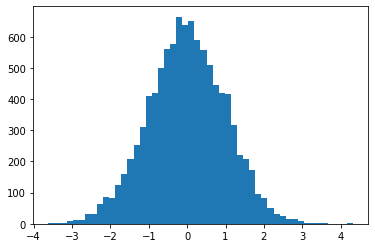

In [4]:
arr = np.random.normal(size=10000)
fig = plt.figure()
ax = plt.axes()
ax.hist(arr, bins=50)
plt.show()

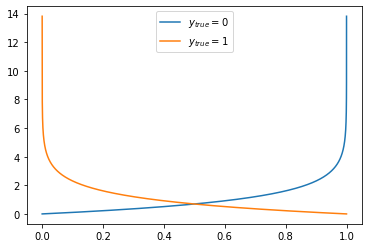

In [5]:
eps = 1e-06 # epsilon, a tiny number to avoid infinity
p = np.linspace(0 + eps, 1 - eps, 10000)
log_loss_0 = -np.log(1-p)
log_loss_1 = -np.log(p)

fig = plt.figure()
ax = plt.axes()

ax.plot(p, log_loss_0, label='$y_{true}=0$') # add label and legend
ax.plot(p, log_loss_1, label='$y_{true}=1$')
ax.legend()

plt.show()

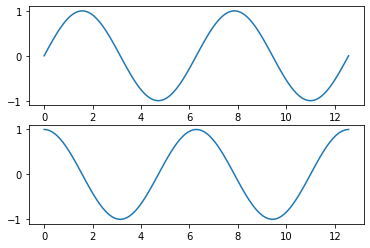

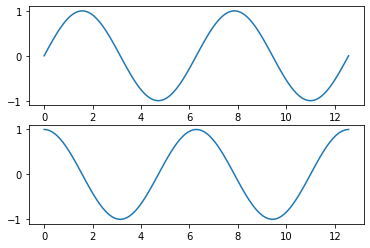

In [6]:
# Plotting with matlab style: stateful interface
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

# Plotting with object-oriented style: object method interface # （Recommended!）
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

The general steps to create plots are:
1. Creating arrays.
2. Generating figure and axes objects(respectively or simultaneously).
3. Calling various methods of axes object to generate main plot.
4. Calling various methods of axes object to add elements.
5. Show or save plots.

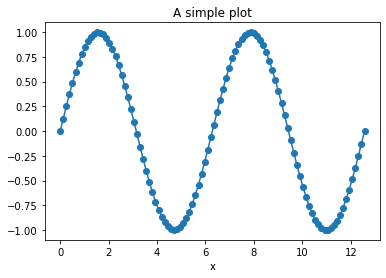

In [8]:
x = np.linspace(0, np.pi*4, 100)
y = np.sin(x)

fig, axes = plt.subplots()

axes.plot(x, y)
# axes.scatter(x, y)
axes.set_title('A simple plot')
axes.set_xlabel('x')
# fig.savefig('a_simple_plot.png')

plt.show()

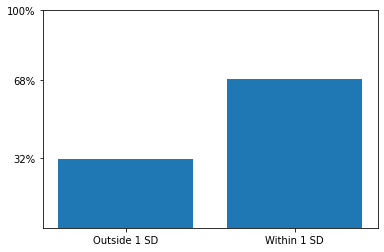

In [22]:
arr = np.random.normal(size=10000)
outside_one_std = np.sum((arr > 1) | (arr < -1)) / arr.size
within_one_std = np.sum((-1 <= arr) & (arr <= 1)) / arr.size
y = [outside_one_std, within_one_std]
x = [1, 2]

fig = plt.figure()
axes = plt.axes()

axes.set_xticks([1, 2])
axes.set_yticks([0.32,  0.68, 1])
axes.set_xticklabels(['Outside 1 SD', 'Within 1 SD'])
axes.set_yticklabels(['32%', '68%', '100%'])
axes.set_ylim([0, 1])
axes.text(1 - 0.05, 0.35, '32%') # location of text
axes.text(2 - 0.05, 0.70, '68%')

axes.bar(x, y)
plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24876  100 24876    0     0  41529      0 --:--:-- --:--:-- --:--:-- 41529
(459, 344, 3)


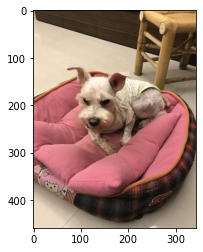

In [15]:
!curl -o a_very_cute_schnauzer.jpg https://i.imgur.com/hTFmWKO.jpg?1
pic = Image.open('a_very_cute_schnauzer.jpg')

arr = np.array(pic)
print(arr.shape)

fig, axes = plt.subplots()
axes.imshow(arr)

axes.set_title('A very cute Schnauzer.')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_xticks([])
axes.set_yticks([])

plt.show()

Plotting with real world data: `daily_report`

In [24]:
def get_latest_daily_report():
    today = date.today()
    day_delta = timedelta(days=1)
    data_date = today
    while True:
        data_date_str = date.strftime(data_date, '%m-%d-%Y')
        print("Try importing {} data...".format(data_date_str))
        daily_report_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv".format(data_date_str)
        try:
            daily_report = pd.read_csv(daily_report_url)
            print("Successfully imported {} data!".format(data_date_str))
            break
        except HTTPError:
            data_date -= day_delta
    return daily_report
daily_report = get_latest_daily_report()

world_top_ten = daily_report.groupby('Country_Region')['Confirmed'].sum().sort_values()[-10:]
world_top_ten

Try importing 05-21-2021 data...
Try importing 05-20-2021 data...
Try importing 05-19-2021 data...
Successfully imported 05-19-2021 data!


Country_Region
Spain              3625928
Germany            3627777
Italy              4172525
United Kingdom     4468366
Russia             4908794
Turkey             5151038
France             5978650
Brazil            15812055
India             25772440
US                33026624
Name: Confirmed, dtype: int64

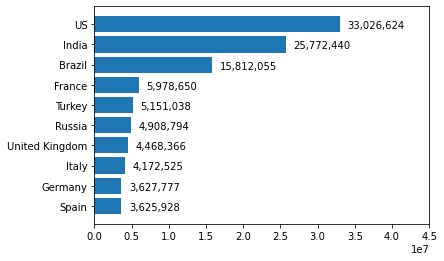

In [25]:
fig = plt.figure()
axes = plt.axes()
axes.barh(world_top_ten.index, world_top_ten.values)
for i in range(world_top_ten.size):
    v = world_top_ten.values[i]
    axes.text(v + 1000000, i - 0.2, "{:,}".format(v))
axes.set_xlim(0, 4.5e7)
plt.show()

Plotting with real world data: `Timeseries`

In [26]:
def get_time_series():
    request_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    time_series = pd.read_csv(request_url)
    id_cols = time_series.columns[:4]
    time_series_long = pd.melt(time_series, id_vars=id_cols, var_name='Date', value_name='Confirmed')
    date = pd.to_datetime(time_series_long['Date'])
    time_series_long = time_series_long.drop('Date', axis=1)
    time_series_long.insert(4, 'Date', date)
    groupby_series = time_series_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum()
    out = pd.DataFrame(groupby_series).reset_index()
    return out

time_series = get_time_series()
time_series.head()

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


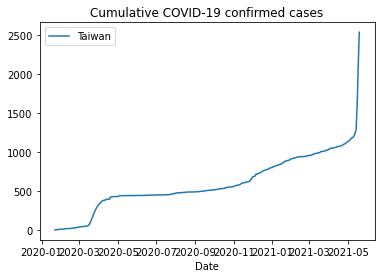

In [27]:
def plot_lines_with_legends(country_names, ts_df):
    fig = plt.figure()
    ax = plt.axes()
    for country in country_names:
        country_data = ts_df[ts_df['Country/Region'].str.contains(country)]
        x = country_data['Date']
        y = country_data['Confirmed']
        ax.plot(x, y, label=country)
    ax.set_xlabel('Date')
    ax.set_title('Cumulative COVID-19 confirmed cases')
    ax.legend()
    plt.show()
    
plot_lines_with_legends(['Taiwan'], time_series)

<class 'numpy.ndarray'>
(2, 3)


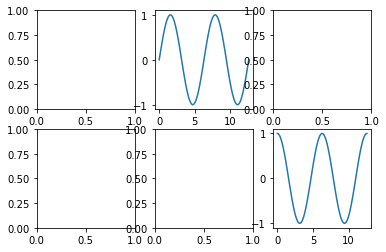

In [29]:
fig, axes = plt.subplots(2, 3)
print(type(axes))
print(axes.shape)

x = np.linspace(0, 4*np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
axes[0, 1].plot(x, y_sin)
axes[1, 2].plot(x, y_cos)
plt.show()